# Multilayer Perceptron (MLP)

- "vanilla" feed-forward neural network

- consists of an input layer, multiple hidden layers and an output layer (deep neural network => deep learning)

- trained using the backpropagation algorithm

![MLP](../img/mlp.png)

# Forward pass

- passing data through the network until output $\hat{\mathbf{y}}$ is calculated

- matrix multiplication of an input matrix $\mathbf{X}$ and weights of every hidden layer $\mathbf{W}_n$ plus a bias vector $\mathbf{b}_n$ passed to an activation function $f_n$ until the output layer is reached

- it is quite common for the output layer to have a different activation function as compared to the hidden layers

- forward pass for the image above:

$$
\begin{align*}

\begin{aligned}
\mathbf{Z}_1 &= \mathbf{X} \cdot \mathbf{W}_1 + \mathbf{b}_1 \\
\mathbf{U}_1 &= f_1(\mathbf{Z}_1) \\
&\text{Hidden layer 1}
\end{aligned} \quad \quad

\begin{aligned}
\mathbf{Z}_2 &= \mathbf{U}_1 \cdot \mathbf{W}_2 + \mathbf{b}_2 \\
\mathbf{U}_2 &= f_2(\mathbf{Z}_2) \\
&\text{Hidden layer 2}
\end{aligned} \quad \quad

\begin{aligned}
\mathbf{Z}_3 &= \mathbf{U}_2 \cdot \mathbf{W}_3 + \mathbf{b}_3 \\
\mathbf{U}_3 &= f_3(\mathbf{Z}_3) \\
&\text{Hidden layer 3}
\end{aligned} \quad \quad

\begin{aligned}
\mathbf{Z}_4 &= \mathbf{U}_3 \cdot \mathbf{W}_4 + \mathbf{b}_4 \\
\mathbf{U}_4 &= f_4(\mathbf{Z}_4) \\
&\text{Hidden layer 4}
\end{aligned} \quad \quad

\begin{aligned}
\mathbf{Z}_5 &= \mathbf{U}_4 \cdot \mathbf{W}_5 + \mathbf{b}_5 \\
\hat{\mathbf{y}} &= f_5(\mathbf{Z}_5) \\
&\text{Output layer}
\end{aligned}

\end{align*}
$$


# Backpropagation (backward pass)

- distributing gradients backwards through the network using the chain rule

- gradient calculation starts at the output layer using the loss function $\mathcal{L}(\hat{y}, y)$

- calculated gradients of network parameters (weights $\mathbf{W}$ and biases $\mathbf{b}$) are used to minimize the loss function using gradient descent

- backward pass for the image above ($\odot$ denotes element-wise multiplication):

$$
\begin{align*}

\begin{aligned}
\frac{\partial \mathcal{L}}{\partial \mathbf{Z}_5} &= \frac{\partial \mathcal{L}}{\partial \hat{\mathbf{y}}} \cdot \frac{\partial \hat{\mathbf{y}}}{\partial \mathbf{Z}_5} \\
&= \frac{\partial \mathcal{L}}{\partial \hat{\mathbf{y}}} \odot f_5'(\mathbf{Z}_5) \\
&= \delta_{5}
\end{aligned} \quad \quad

\begin{aligned}
\frac{\partial \mathcal{L}}{\partial \mathbf{W}_5} &=  \frac{\partial \mathcal{L}}{\partial \mathbf{Z}_5} \cdot \frac{\partial \mathbf{Z}_5}{\partial \mathbf{W}_5} \\
&= \mathbf{U}_{4}^{\intercal} \cdot \frac{\partial L}{\partial \mathbf{Z}_5} \\
&= \mathbf{U}_{4}^{\intercal} \cdot \delta_{5}
\end{aligned} \quad \quad

\begin{aligned}
\frac{\partial \mathcal{L}}{\partial \mathbf{b}_5} &=  \frac{\partial \mathcal{L}}{\partial \mathbf{Z}_5} \cdot \frac{\partial \mathbf{Z}_5}{\partial \mathbf{b}_5} \\
&= \delta_{5} \cdot 1 \\
&= \sum \delta_{5}
\end{aligned}

\end{align*}
$$

$$
\begin{align*}

\begin{aligned}
\frac{\partial \mathcal{L}}{\partial \mathbf{U}_4} &= \frac{\partial \mathcal{L}}{\partial \mathbf{Z}_5} \cdot \frac{\partial \mathbf{Z}_5}{\partial \mathbf{U}_4} \\
&= \frac{\partial \mathcal{L}}{\partial \mathbf{Z}_5} \cdot \mathbf{W}_{5}^{\intercal} \\
&= \delta_{5} \cdot \mathbf{W}_{5}^{\intercal}
\end{aligned} \quad \quad

\begin{aligned}
\frac{\partial \mathcal{L}}{\partial \mathbf{Z}_4} &= \frac{\partial \mathcal{L}}{\partial \mathbf{U}_4} \cdot \frac{\partial \mathbf{U}_4}{\partial \mathbf{Z}_4} \\
&= \left( \delta_{5} \cdot \mathbf{W}_{5}^{\intercal} \right) \odot f_4'(Z_4)\\
&= \delta_{4}
\end{aligned} \quad \quad

\begin{aligned}
\frac{\partial \mathcal{L}}{\partial \mathbf{W}_4} &=  \frac{\partial \mathcal{L}}{\partial \mathbf{Z}_4} \cdot \frac{\partial \mathbf{Z}_4}{\partial \mathbf{W}_4} \\
&= \mathbf{U}_{3}^{\intercal} \cdot \frac{\partial L}{\partial \mathbf{Z}_4} \\
&= \mathbf{U}_{3}^{\intercal} \cdot \delta_{4}
\end{aligned} \quad \quad

\begin{aligned}
\frac{\partial \mathcal{L}}{\partial \mathbf{b}_4} &=  \frac{\partial \mathcal{L}}{\partial \mathbf{Z}_4} \cdot \frac{\partial \mathbf{Z}_4}{\partial \mathbf{b}_4} \\
&= \delta_{4} \cdot 1 \\
&= \sum \delta_{4}
\end{aligned}

\end{align*}
$$

$$\vdots$$
$$\vdots$$

$$
\begin{align*}

\begin{aligned}
\frac{\partial \mathcal{L}}{\partial \mathbf{U}_1} &= \frac{\partial \mathcal{L}}{\partial \mathbf{Z}_2} \cdot \frac{\partial \mathbf{Z}_2}{\partial \mathbf{U}_1} \\
&= \frac{\partial \mathcal{L}}{\partial \mathbf{Z}_2} \cdot \mathbf{W}_{2}^{\intercal} \\
&= \delta_{2} \cdot \mathbf{W}_{2}^{\intercal}
\end{aligned} \quad \quad

\begin{aligned}
\frac{\partial \mathcal{L}}{\partial \mathbf{Z}_1} &= \frac{\partial \mathcal{L}}{\partial \mathbf{U}_1} \cdot \frac{\partial \mathbf{U}_1}{\partial \mathbf{Z}_1} \\
&= \left( \delta_{2} \cdot \mathbf{W}_{2}^{\intercal} \right) \odot f_1'(Z_1)\\
&= \delta_{1}
\end{aligned} \quad \quad

\begin{aligned}
\frac{\partial \mathcal{L}}{\partial \mathbf{W}_1} &=  \frac{\partial \mathcal{L}}{\partial \mathbf{Z}_1} \cdot \frac{\partial \mathbf{Z}_1}{\partial \mathbf{W}_1} \\
&= \mathbf{X}^{\intercal} \cdot \frac{\partial \mathcal{L}}{\partial \mathbf{Z}_1} \\
&= \mathbf{X}^{\intercal} \cdot \delta_{1}
\end{aligned} \quad \quad

\begin{aligned}
\frac{\partial \mathcal{L}}{\partial \mathbf{b}_1} &=  \frac{\partial \mathcal{L}}{\partial \mathbf{Z}_1} \cdot \frac{\partial \mathbf{Z}_1}{\partial \mathbf{b}_1} \\
&= \delta_{1} \cdot 1 \\
&= \sum \delta_{1}
\end{aligned}

\end{align*}
$$

# Gradient descent

- the most common training algorithm

- updates network parameters iteratively using gradients calculated in backpropagation to minimize the loss function $\mathcal{L}$

- general formula:

$$ \text{new parameters} = \text{old parameters} - \text{learning rate} \cdot \text{gradient of old parameters}$$
$$ \mathbf{W}_{\text{new}} = \mathbf{W}_{\text{old}} - \alpha \cdot \frac{\partial \mathcal{L}}{\partial \mathbf{W}_{\text{old}}}$$
$$ \mathbf{b}_{\text{new}} = \mathbf{b}_{\text{old}} - \alpha \cdot \frac{\partial \mathcal{L}}{\partial \mathbf{b}_{\text{old}}}$$

# Layer

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from dlfs.base import Layer

class DenseLayer(Layer):
    
    def __init__(self, n_inputs: int, n_neurons: int) -> None:
        """
        Layer of neurons consisting of a weight matrix and bias vector.

        Parameters
        ----------
        n_inputs : int
            Number of inputs that connect to the layer.

        n_neurons : int
            Number of neurons the layer consists of.

        Attributes
        ----------
        weights : numpy.ndarray
            Matrix of weight coefficients.

        biases : numpy.ndaray
            Vector of bias coefficients.
        """

        # Weights are randomly initialized, small random numbers seem to work well
        self.weights = 0.1 * np.random.randn(n_inputs, n_neurons)
        # Bias vector is initialized to a zero vector
        self.biases = np.zeros(n_neurons)

    def forward(self, inputs: np.ndarray) -> None:
        """
        Forward pass using the dense layer. Creates output attribute.

        Parameters
        ----------
        inputs : numpy.ndarray
            Input matrix.

        Returns
        -------
        None
        """
        # Store inputs for later use (backpropagation)
        self.inputs = inputs
        # Output is the dot product of the input matrix and weights plus biases
        self.output = np.dot(inputs, self.weights) + self.biases

    def backward(self, delta: np.ndarray) -> None:
        """
        Backward pass using the dense layer. Creates gradient attributes with respect to layer weights, biases and inputs.

        Parameters
        ----------
        delta : np.ndarray
            Accumulated gradient obtained by backpropagation.

        Returns
        -------
        None
        """
        self.dweights = np.dot(self.inputs.T, delta)
        self.dbiases = np.sum(delta, axis=0)
        self.dinputs = np.dot(delta, self.weights.T)

# Function for 2D plotting

In [23]:
def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.03  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);

# Simple XOR dataset for classification

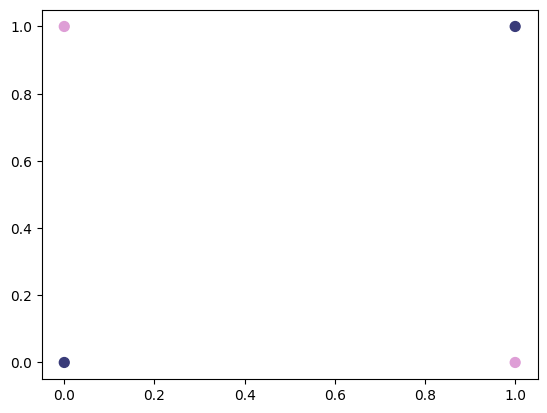

In [24]:
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([0, 1, 1, 0])

plot_2d_clf_problem(X, y)

===== EPOCH : 0 ===== LOSS : 0.69317 =====
===== EPOCH : 500 ===== LOSS : 0.69315 =====
===== EPOCH : 1000 ===== LOSS : 0.69312 =====
===== EPOCH : 1500 ===== LOSS : 0.00868 =====
===== EPOCH : 2000 ===== LOSS : 0.00250 =====
Accuracy: 1.0


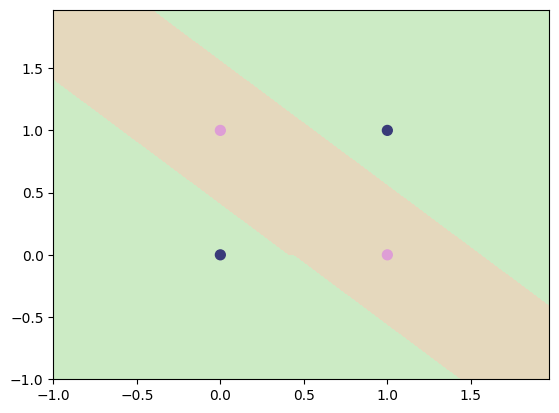

In [25]:
from dlfs import Model
from dlfs.loss import BCE_Loss
from dlfs.optimizers import Optimizer_SGD, Optimizer_Adam
from dlfs.layers import DenseLayer
from dlfs.activation import Sigmoid

model = Model(loss_function=BCE_Loss(), optimizer=Optimizer_SGD(learning_rate=5e-1, momentum=0.5))

model.add(DenseLayer(2, 8))
model.add(Sigmoid())
model.add(DenseLayer(8, 1))
model.add(Sigmoid())

model.train(X, y.reshape(-1, 1), epochs=2000, print_every=500)
print(f'Accuracy: {np.mean(y.reshape(-1, 1) == np.round(model.predict(X)))}')
plot_2d_clf_problem(X, y, lambda x: model.predict(x) > 0.5)

# Nonlinear circles dataset for classification

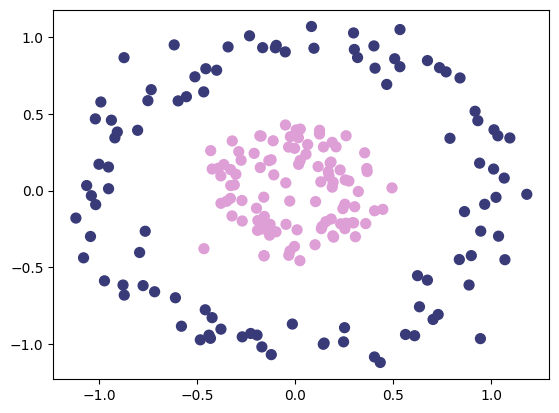

In [26]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=200, factor=0.3, noise=0.1, random_state=50)
plot_2d_clf_problem(X, y)

Accuracy: 1.0


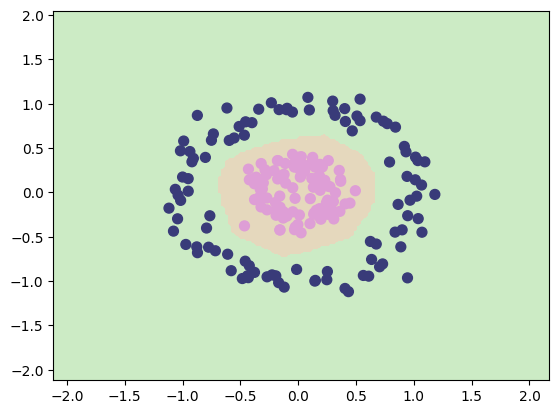

In [27]:
from dlfs.activation import ReLU

layers = [DenseLayer(2, 16), 
          ReLU(),
          DenseLayer(16, 16), 
          ReLU(), 
          DenseLayer(16, 1), 
          Sigmoid()]

model = Model(layers=layers, loss_function=BCE_Loss(), optimizer=Optimizer_SGD(learning_rate=5e-3, momentum=0.5, decay=1e-2))

model.train(X, y.reshape(-1, 1))
print(f'Accuracy: {np.mean(y.reshape(-1, 1) == np.round(model.predict(X)))}')
plot_2d_clf_problem(X, y, lambda x: model.predict(x) > 0.5)

# Simple regression dataset

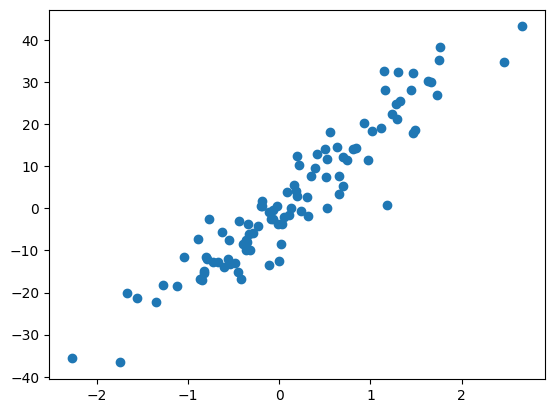

In [28]:
from sklearn.datasets import make_regression

X, y = make_regression(n_features=1, n_informative=1, n_targets=1, noise=5.3, random_state=52)

plt.scatter(X, y)
plt.show()

===== EPOCH : 0 ===== LOSS : 143.40302 =====
===== EPOCH : 500 ===== LOSS : 14.43942 =====
===== EPOCH : 1000 ===== LOSS : 14.43942 =====


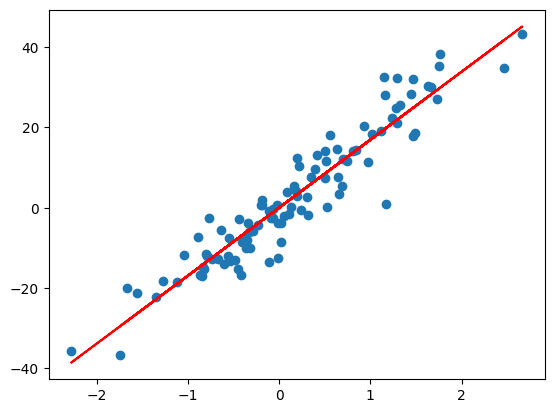

In [29]:
from dlfs.loss import MSE_Loss

layers = [DenseLayer(1, 1)]

model = Model(layers=layers, loss_function=MSE_Loss(), optimizer=Optimizer_SGD(learning_rate=1e-3, momentum=0.3, decay=0.))

model.train(X, y.reshape(-1, 1), print_every=500, epochs=1000)

plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.show()

# Complex regression dataset

In [44]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
X_test = scaler_X.transform(X_test)
y_test = y_test.reshape(-1, 1)

print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}, y_test: {y_test.shape}')

X_train: (16512, 8), y_train: (16512, 1)
X_test: (4128, 8), y_test: (4128, 1)


In [45]:
from dlfs.activation import Linear

layers = [DenseLayer(8, 16),
          ReLU(),
          DenseLayer(16, 1),
          Linear()
          ]

model = Model(layers=layers, loss_function=MSE_Loss(), optimizer=Optimizer_SGD(learning_rate=1e-5, momentum=0.2, decay=0.))

model.train(X_train, y_train.reshape(-1, 1), print_every=500)

===== EPOCH : 0 ===== LOSS : 0.48952 =====
===== EPOCH : 500 ===== LOSS : 0.15023 =====
===== EPOCH : 1000 ===== LOSS : 0.13860 =====


In [46]:
y_pred = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred)

print(f'Error: {model.loss_function.calculate(y_pred, y_test)}')

Error: 0.1846444608788091
